Note: you may need to restart the kernel to use updated packages.


In [48]:
from enum import Enum

import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

from biosynfoni.subkeys import get_names

# Load the data
chebi = pd.read_csv('~/thesis/input/chebi/chebi_overlap_biosynfoni.csv', dtype=int, header = None)
# classes = np.loadtxt('~/thesis/input/chebi/chebi_classes.tsv', delimiter=',', dtype='str')
classes = pd.read_csv('~/thesis/input/chebi/chebi_classes.tsv', sep='\t', header = None)
classes = classes[0].str.split(',', expand=True)
classes.loc[classes[1]=='isoprenoid', [0,1]] = (classes.loc[classes[1]=='isoprenoid'][[1,0]]).values
classes = classes.astype('category')

chebi = pd.DataFrame(chebi)
chebi.columns = get_names()
substructure_names = chebi.columns

chebi[[f'class_{i}' for i in classes.columns]] = classes
chebi

chebi_fp = chebi[substructure_names]
chebi_fp
chebi

# sns.pairplot(chebi, x_vars = substructure_names[3:15], y_vars = substructure_names[3:15], hue='class_0', diag_kind='kde');


,coenzyme_a,nadh,nadph,standard_amino_acids,non-standard_amino_acids,open_pyranose,open_furanose,pyranose,furanose,indoleC2N,...,C8_ring,C9_ring,C10_ring,class_0,class_1,class_2,class_3,class_4,class_5,class_6
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,phenylpropanoid,NaN,NaN,NaN,NaN,NaN,NaN
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,isoprenoid,fatty_acid,NaN,NaN,NaN,NaN,NaN
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,fatty_acid,NaN,NaN,NaN,NaN,NaN,NaN
3,0,0,0,0,0,0,0,0,0,0,...,0,1,2,isoprenoid,fatty_acid,NaN,NaN,NaN,NaN,NaN
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,fatty_acid,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
18921,0,0,0,0,0,0,0,0,0,0,...,0,0,0,fatty_acid,NaN,NaN,NaN,NaN,NaN,NaN
18922,0,0,0,32,0,0,0,0,0,3,...,0,0,0,amino_acid,NaN,NaN,NaN,NaN,NaN,NaN
18923,0,0,0,0,0,0,0,0,0,0,...,0,1,2,isoprenoid,fatty_acid,NaN,NaN,NaN,NaN,NaN
18924,0,0,0,0,0,0,0,0,0,0,...,0,0,0,fatty_acid,NaN,NaN,NaN,NaN,NaN,NaN


/Users/lucina-may/miniconda3/envs/all/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/Users/lucina-may/miniconda3/envs/all/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/Users/lucina-may/miniconda3/envs/all/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/Users/lucina-may/miniconda3/envs/all/lib/python3.11/site-packages/seaborn/_oldcore.py:1057: FutureWarning: The default of observed=False is deprecate

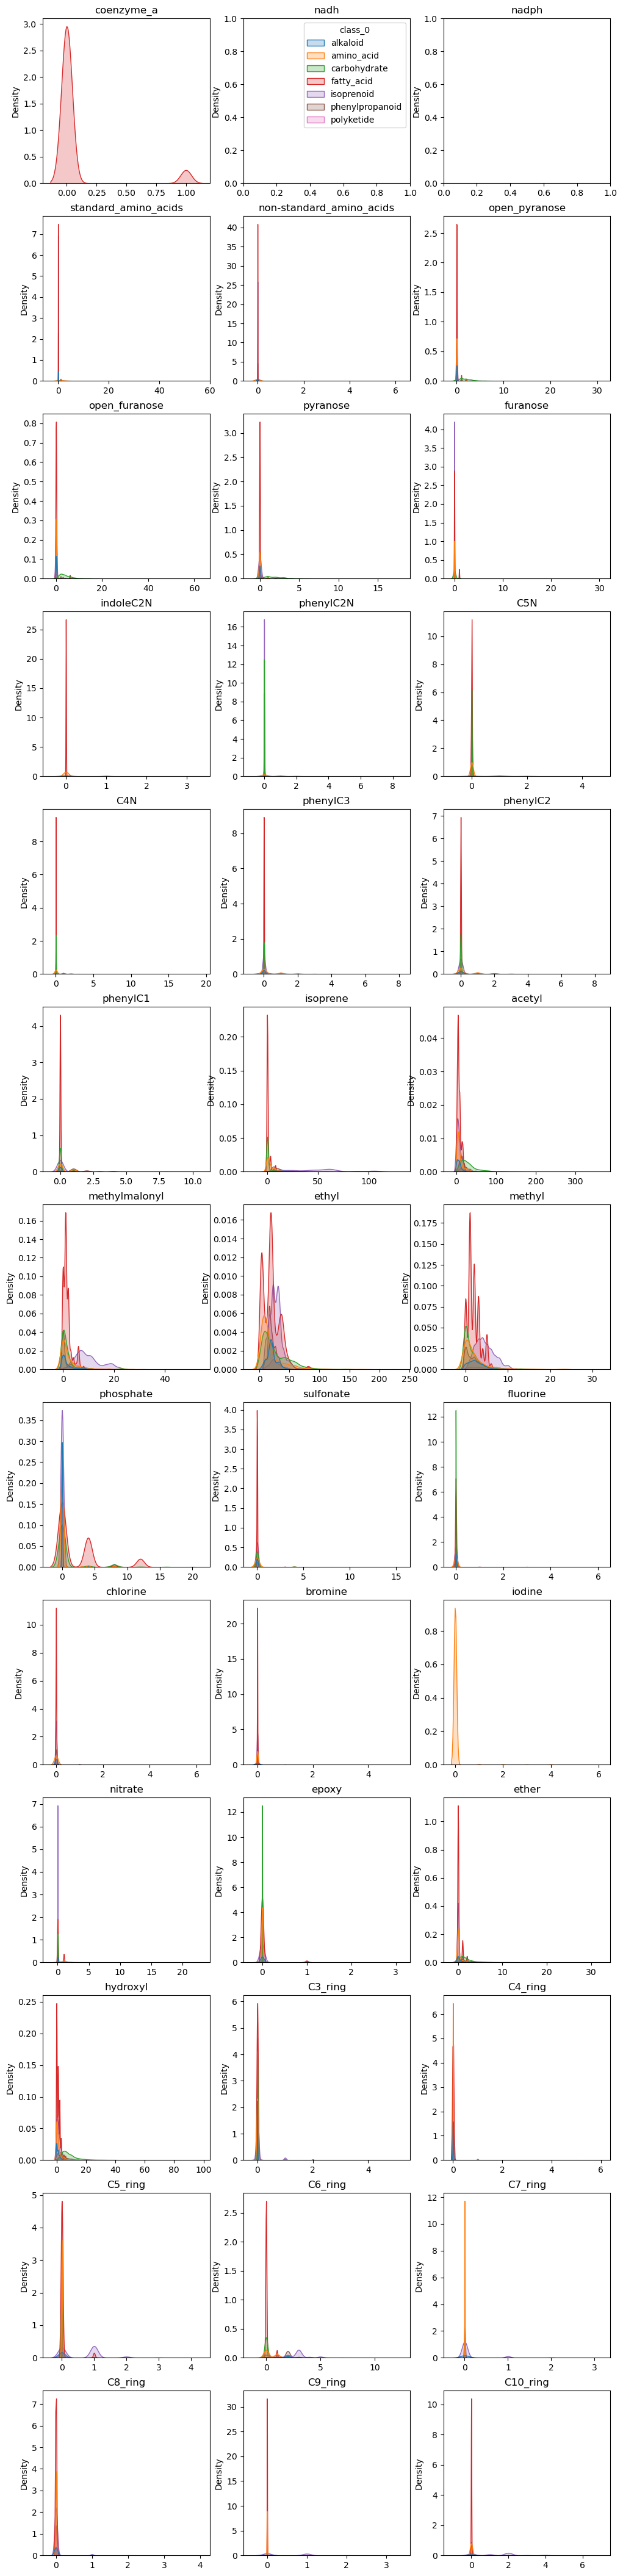

In [53]:
fig, axes = plt.subplots(13,3, figsize=(12, 54))
for i, col in enumerate(chebi_fp.columns):
    #plot the distribution of col per class in chebi[class_0], normalised
    ax = axes[i//3,i%3]
    legend = True if i ==1 else False
    sns.kdeplot(data=chebi,x=col, hue='class_0', fill=True, ax=ax, legend=legend)
    ax.set_title(col)
    ax.set_xlabel('')
    # ax.set_ylabel('')



